#Qualifying Comparison

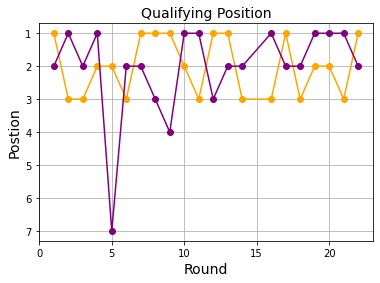

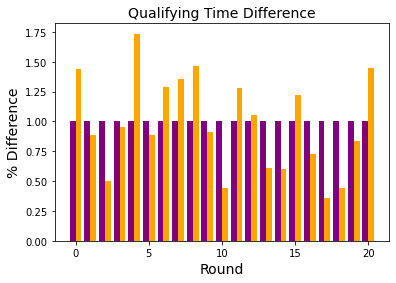

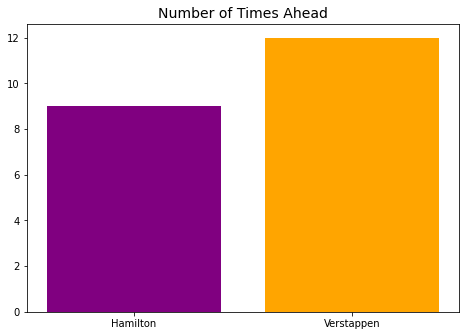

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
8694,8735,1052,830,9,33,1,1:30.499,1:30.318,1:28.997
8716,8757,1053,830,9,33,3,1:15.109,1:14.884,1:14.498
8736,8777,1054,830,9,33,3,1:19.485,1:18.650,1:18.746
8755,8796,1055,830,9,33,2,1:18.090,1:16.922,1:16.777
8775,8816,1056,830,9,33,2,1:11.124,1:10.650,1:10.576
8795,8836,1057,830,9,33,3,1:41.760,1:41.625,1:41.563
8813,8854,1059,830,9,33,1,1:31.001,1:31.080,1:29.990
8833,8874,1058,830,9,33,1,1:04.489,1:04.433,1:03.841
8853,8894,1060,830,9,33,1,1:04.249,1:03.927,1:03.720
8874,8915,1061,830,9,33,2,1:26.751,1:26.315,1:26.209


In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

#imports the required csvs
drivers = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/drivers.csv")
races = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/races.csv")
results = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/results.csv")
qual = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/qualifying.csv")

#removes unneeded data columns
races = races.drop(['date', 'time', 'url'], axis=1)

#removes every race not in the 2021 season
races = races[races['year'] == 2021]


#sorts the data by the round number
races = races.sort_values(by=['round'])


#removes all qualifyings in the 2021 season
#VER race number is 33, HAM race number is 44
qual = qual[qual['raceId'].isin(races['raceId'])]

#this race is omitted due to VER not qualifying
qual = qual[qual['raceId'] != 1066]
races = races[races['raceId'] != 1066]

#splits VER and HAM qualifyings into two sheets
qualver = qual[qual['number'] == 33]
qualham = qual[qual['number'] == 44]

rounds_21 = races['round'].tolist()
 

q3_ham = qualham['q3'].tolist()
for x in range(len(q3_ham)):
  m, s = q3_ham[x].split(':')
  q3_ham[x] = (float(m) * 60) + float(s)

#calculate % difference between HAM and VER
diff = []
for x in range(len(q3_ver)):
  diff.append((q3_ham[x] / q3_ver[x]) * 100 - 99)

constant = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ]
#qualifying position graph


plot1 = plt.plot(rounds_21, qualver['position'], color = 'orange', marker = 'o')
plot2 = plt.plot(rounds_21, qualham['position'], color = 'purple', marker = 'o')
plt.title('Qualifying Position', fontsize=14)
plt.ylabel('Postion', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


#qualifying difference bar graph

a = np.arange(21)
width = 0.4
plt.bar(a - 0.2, constant, width, color = 'purple')
plt.bar(a + 0.2, diff, width, color = 'orange')
plt.title('Qualifying Time Difference', fontsize=14)
plt.ylabel('% Difference', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.show()

#times ahead bar graph
ham_tally = 0
ver_tally = 0
drivers = ['Hamilton', 'Verstappen']

for x in range(len(q3_ham)):
  if q3_ham[x] > q3_ver[x]:
    ham_tally += 1
  else:
    ver_tally += 1 
tallies = [ham_tally, ver_tally]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(drivers, tallies, color = ['purple', 'orange'])

plt.title('Number of Times Ahead', fontsize=14)

plt.show()

qualver


#Race Comparison

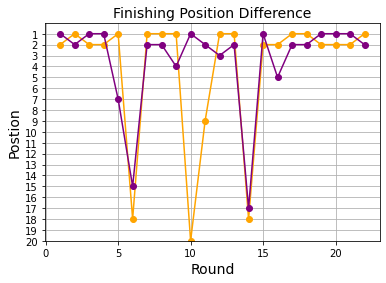

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


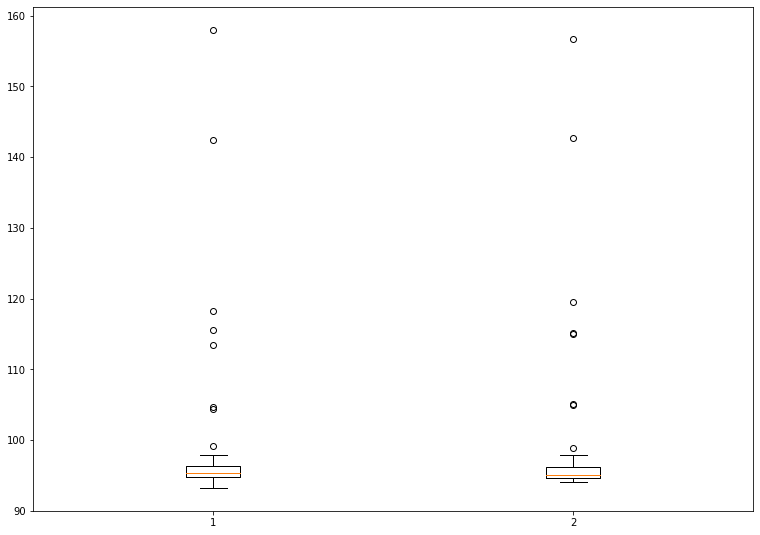

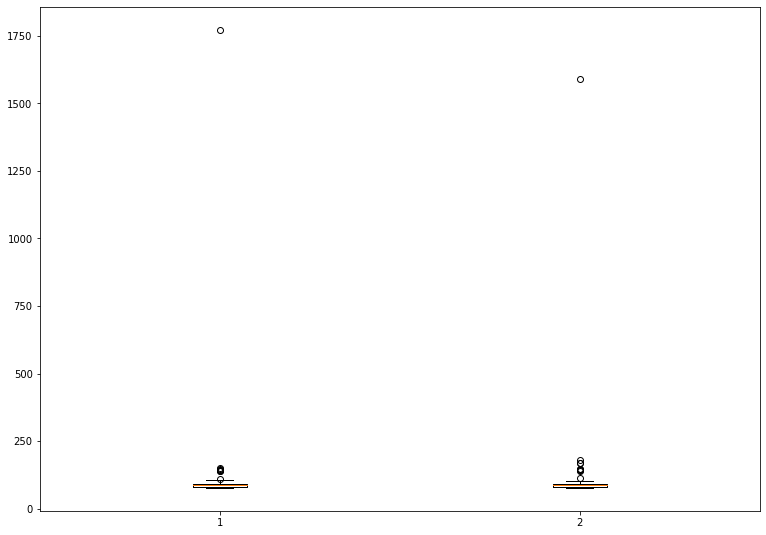

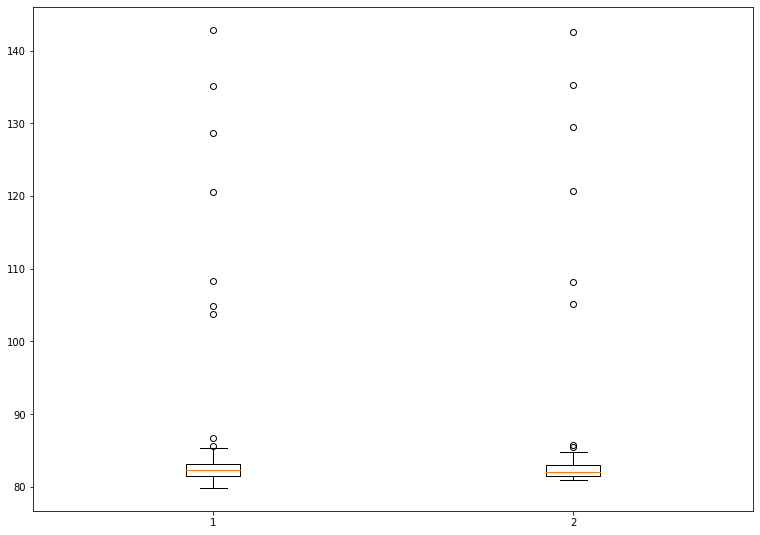

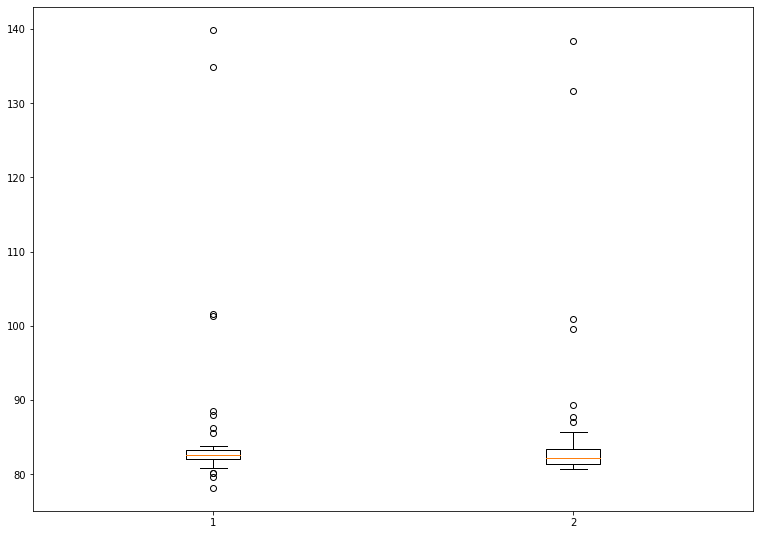

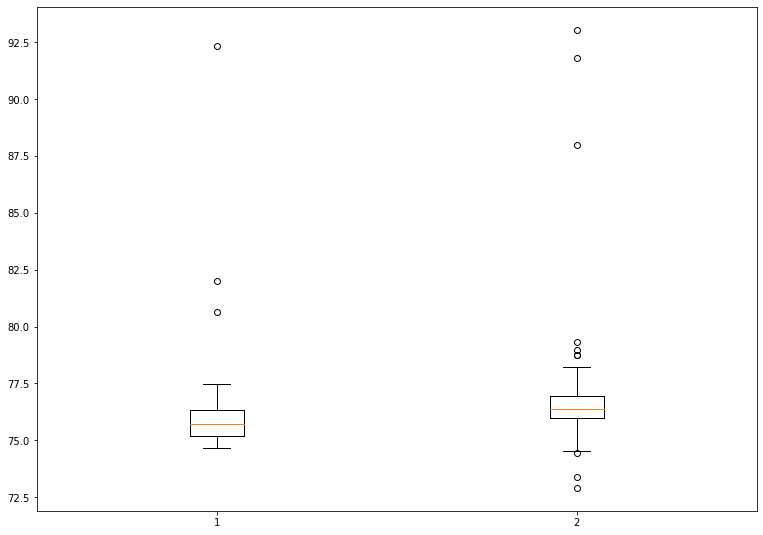

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


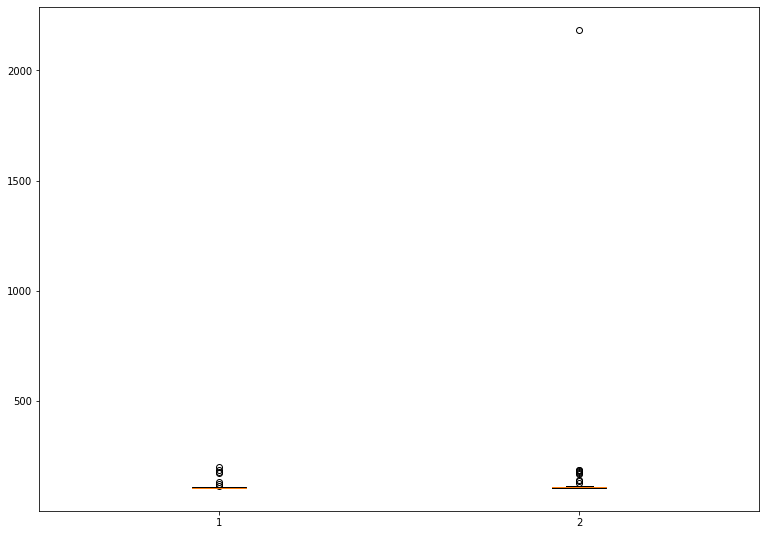

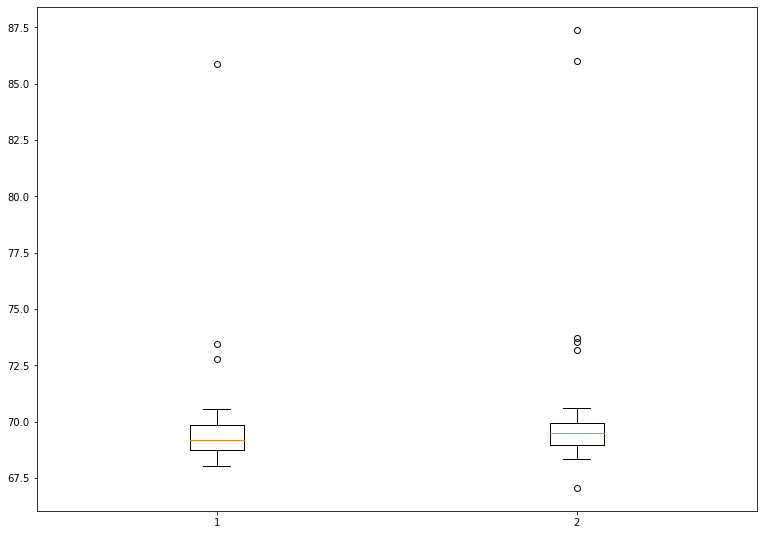

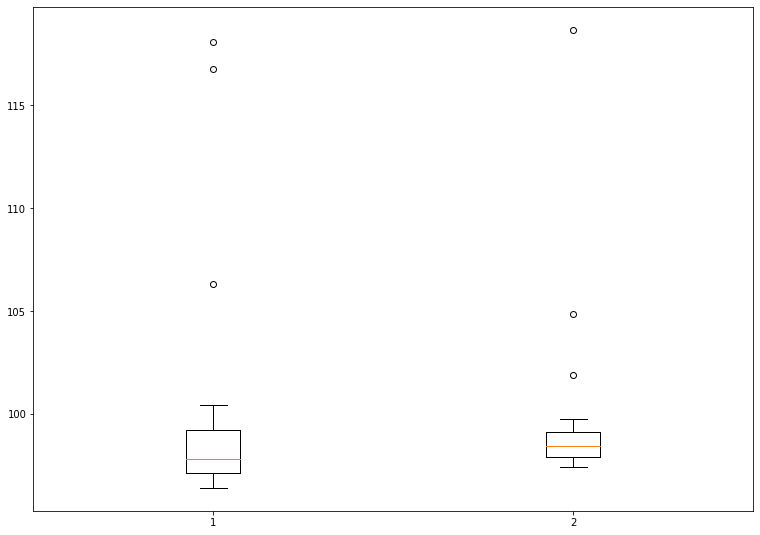

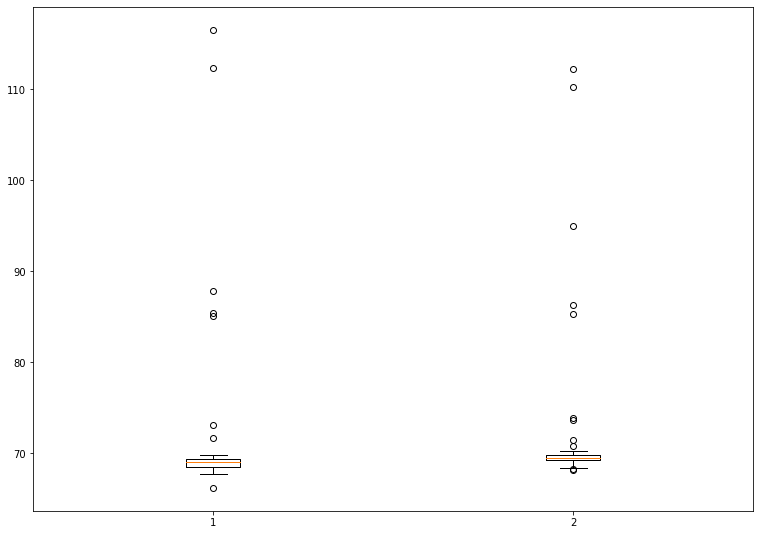

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


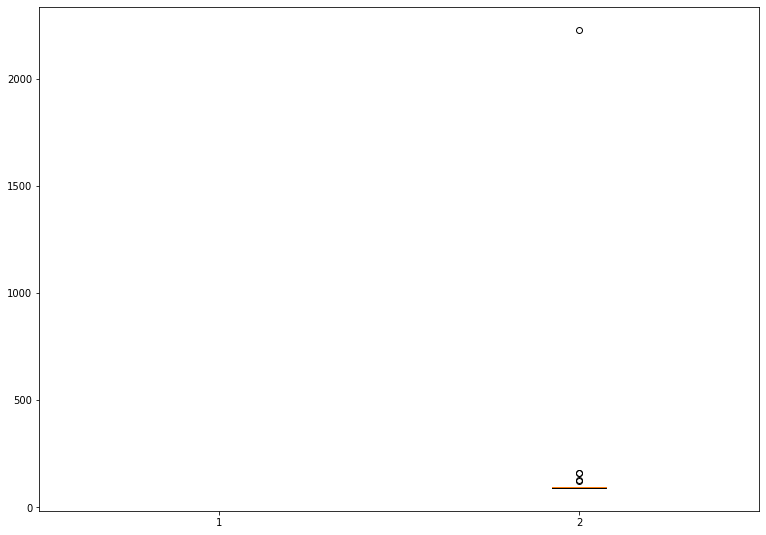

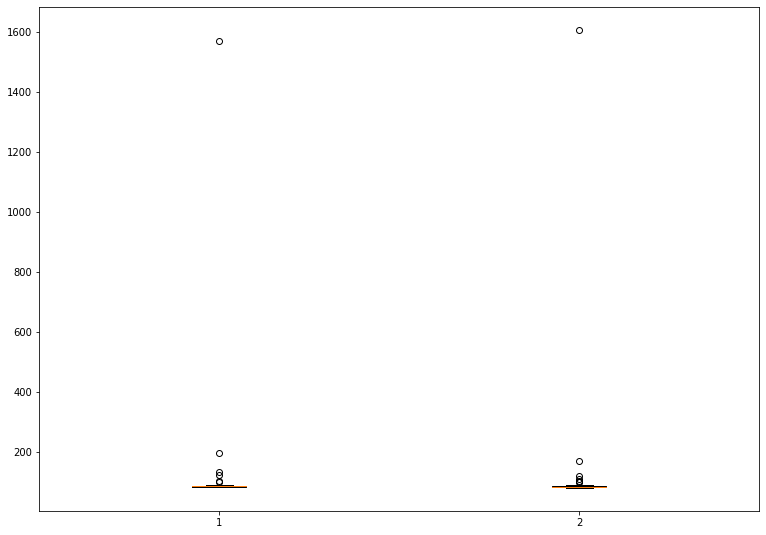

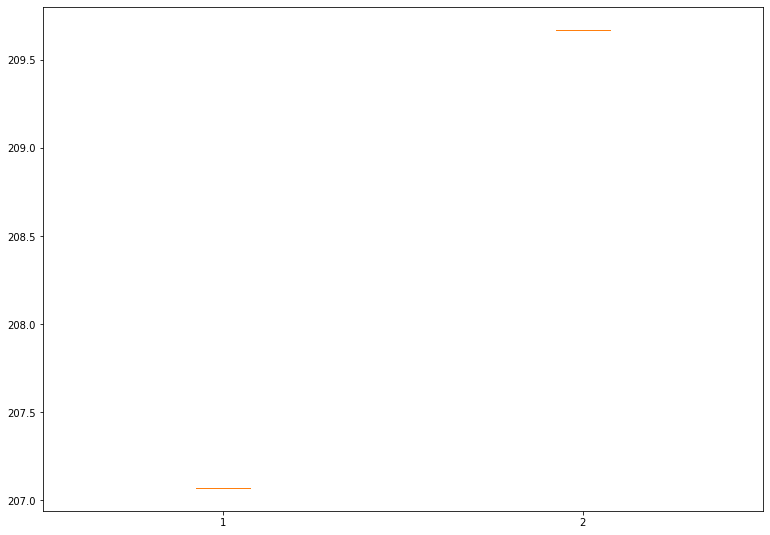

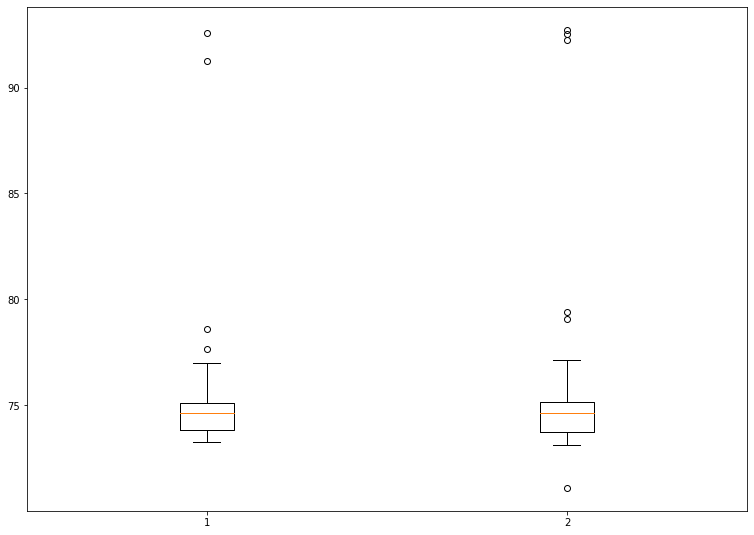

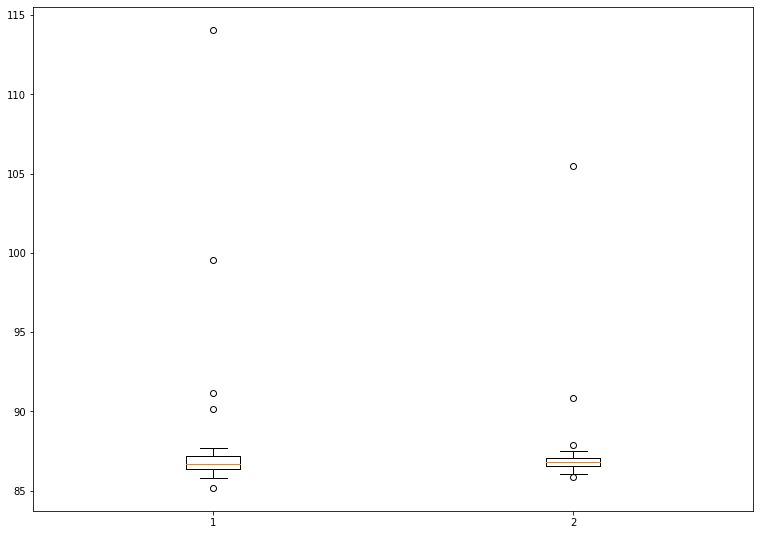

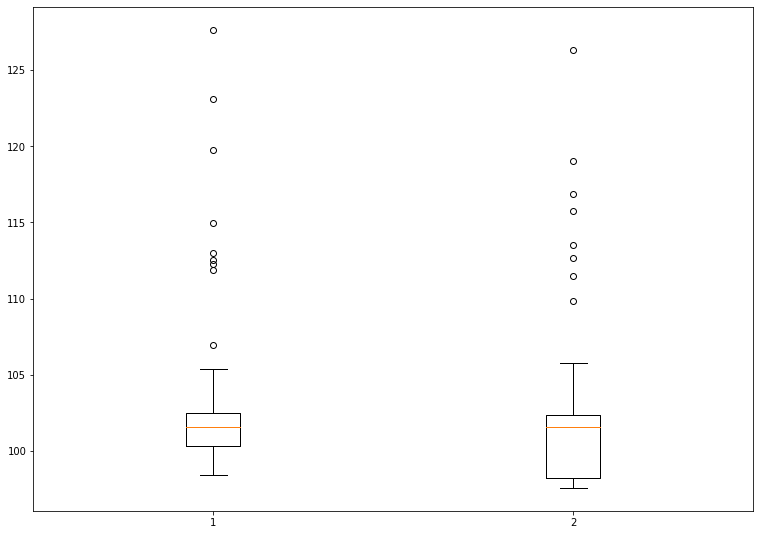

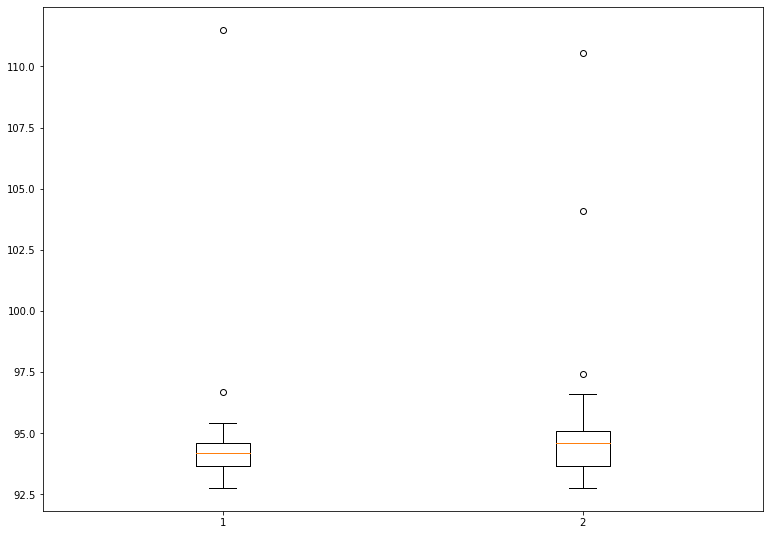

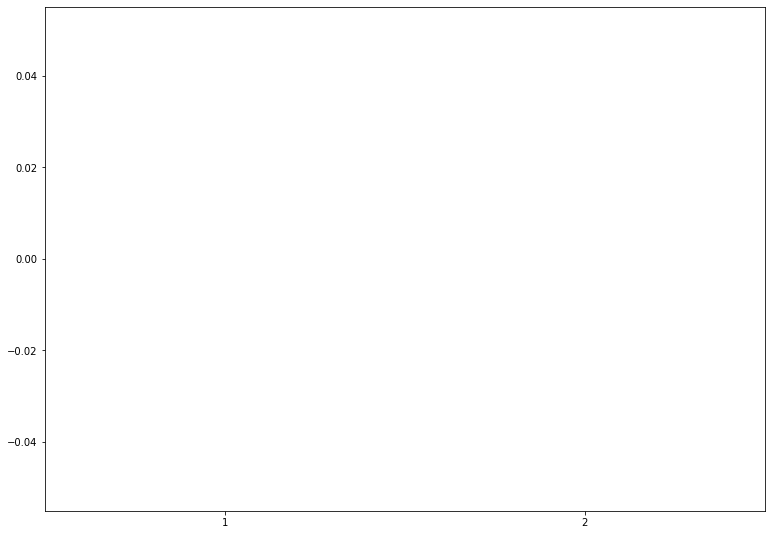

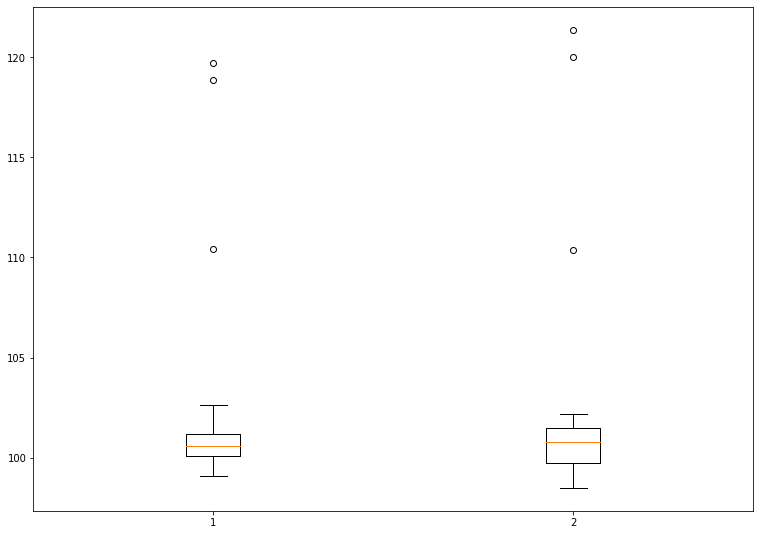

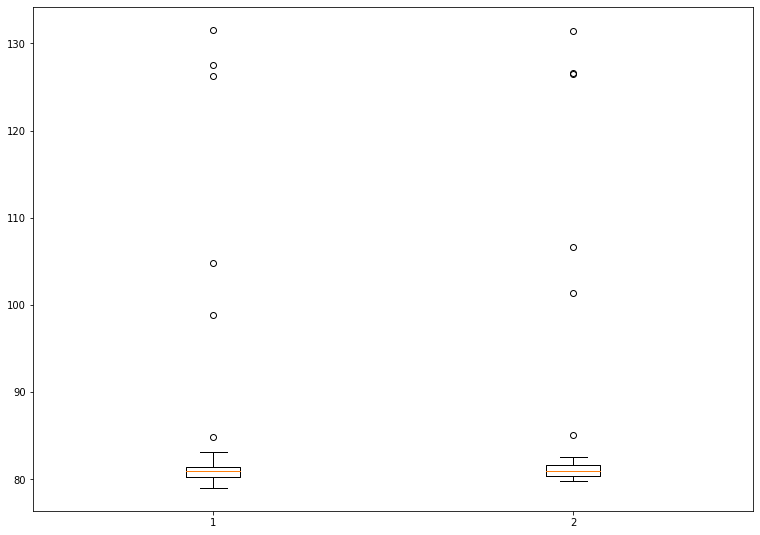

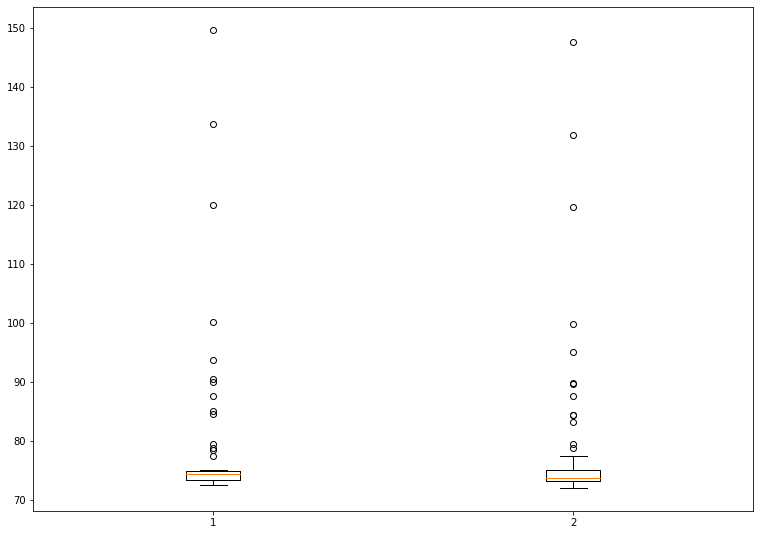

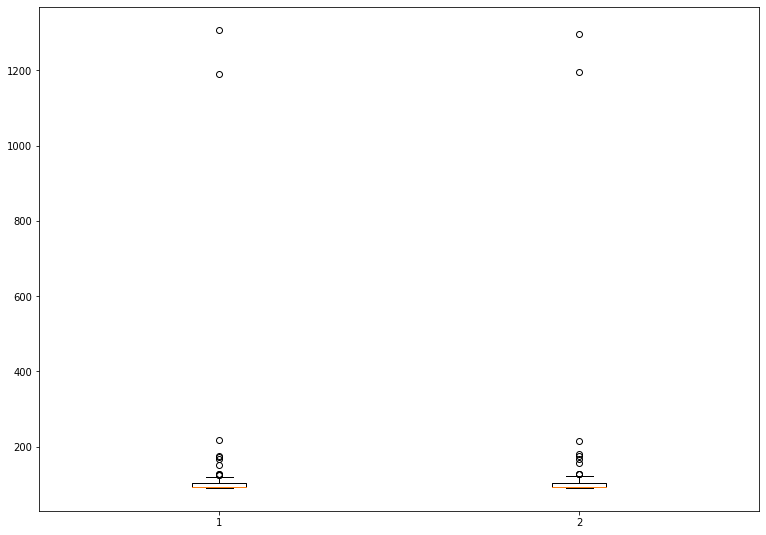

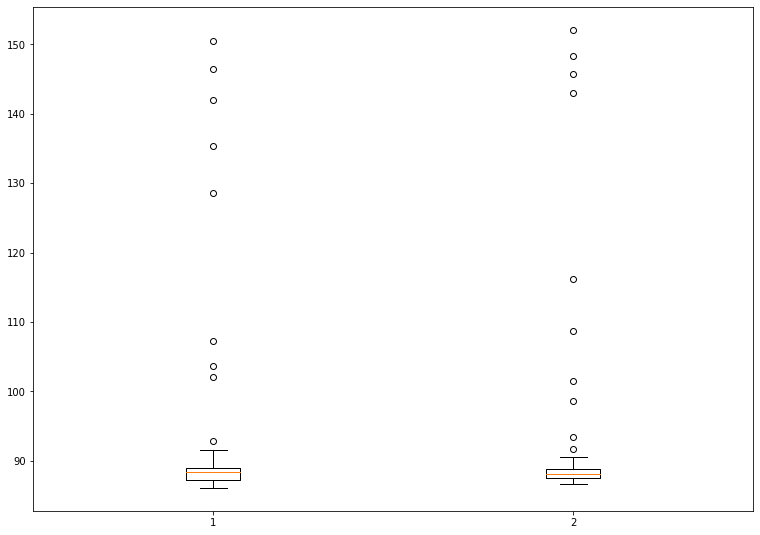

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import scipy.stats as ss


#imports the required csvs
drivers = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/drivers.csv")
races = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/races.csv")
results = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/results.csv")
lap_times = pd.read_csv("https://raw.githubusercontent.com/sandtp/f1dataset/main/lap_times.csv")

#removes unneeded data columns
races = races.drop(['date', 'time', 'url'], axis=1)

#removes every race not in the 2021 season
races = races[races['year'] == 2021]
lap_times = lap_times[lap_times['raceId'].isin(races['raceId'])]

#sorts the data by the round number
races = races.sort_values(by=['round'])

#removes all values not by HAM or VER in the 2021 season
#VER race number is 33, HAM race number is 44
results = results[results['raceId'].isin(races['raceId'])]
racever = results[results['number'] == '33']
raceham = results[results['number'] == '44']

ver_pos = racever['positionOrder'].tolist()
ham_pos = raceham['positionOrder'].tolist()

ver_laps = lap_times[lap_times['driverId'] == 830]
ham_laps = lap_times[lap_times['driverId'] == 1]
#Finishing position graph

rounds_21 = races['round'].tolist()
plot1 = plt.plot(rounds_21, ver_pos, color = 'orange', marker = 'o')
plot2 = plt.plot(rounds_21, ham_pos, color = 'purple', marker = 'o')
plt.title('Finishing Position Difference', fontsize=14)
plt.ylabel('Postion', fontsize=14)
plt.xlabel('Round', fontsize=14)
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(20)
plt.yticks(np.arange(min(ver_pos), max(ver_pos)+1, 1.0))
plt.show()

#change lap times to seconds
ver_seconds = ver_laps['time'].tolist()
for x in range(len(ver_seconds)):
  m, s = ver_seconds[x].split(':')
  ver_seconds[x] = (float(m) * 60) + float(s)

ham_seconds = ham_laps['time'].tolist()
for x in range(len(ham_seconds)):
  m, s = ham_seconds[x].split(':')
  ham_seconds[x] = (float(m) * 60) + float(s)

seconds = {'time_s': ham_seconds}

s = pd.DataFrame(seconds)
ham_laps['time'] = s['time_s'].values

seconds = {'time_s': ver_seconds}

s = pd.DataFrame(seconds)
ver_laps['time'] = s['time_s'].values


raceid = 1052



#scatter plots
x = []
while raceid <= 1073:
  single_race_ver = ver_laps[ver_laps['raceId'] == raceid]
  single_race_ham = ham_laps[ham_laps['raceId'] == raceid]

  data = [single_race_ver['time'], single_race_ham['time']]
  fig = plt.figure(figsize = (10, 7))

  ax = fig.add_axes([0, 0, 1, 1])
  bp = ax.boxplot(data)


  plt.show()
  raceid += 1